# Linear Regression Analysis  Project
### Ecommerce Client 
In this project, I am working with a dataset available on Kaggle that contains information about customers of an e-commerce website. The dataset includes the following key features:

- Avg. Session Length: The average duration of in-store style advice sessions.
- Time on App: The average time customers spend on the mobile app, measured in minutes.
- Time on Website: The average time customers spend on the website, measured in minutes.
- Length of Membership: The number of years the customer has been a member.
  
The goal of this project is to help the company make a data-driven decision on whether to prioritize enhancing their mobile app experience or improving their website. Using the data, I will analyze customer behavior, uncover insights, and provide recommendations to support their decision-making process.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Getting the data 

In [10]:
customer_data=pd.read_csv(r"C:\Users\MUNYUA CHARLES\Downloads\Ecommerce Customers.txt")

In [15]:
customer_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [17]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [19]:
customer_data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [21]:
customer_data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [23]:
customer_data.shape

(500, 8)

# Exploratory Data Analysis

First we ask the following question: How are the client's time spent on each platform related to the amount that they spend per year? There doesn't seem to be much correlation between the time on the desktop website with the amount that clients spend per year. On the other side, the second graph shows that there seems to be a small correlation between the time spent on the app and the yearly spending. This is probably because these clients tend to spend less time browsing on the phone. Maybe the payment process is faster on the app or the calls-to-action are more successful there.

After analysing the pairplot, we see that there does seem to be one big positive correlation between two variables: the length of membership and the yearly expenditure. In the end we recrate this plot to visualise the regression line.

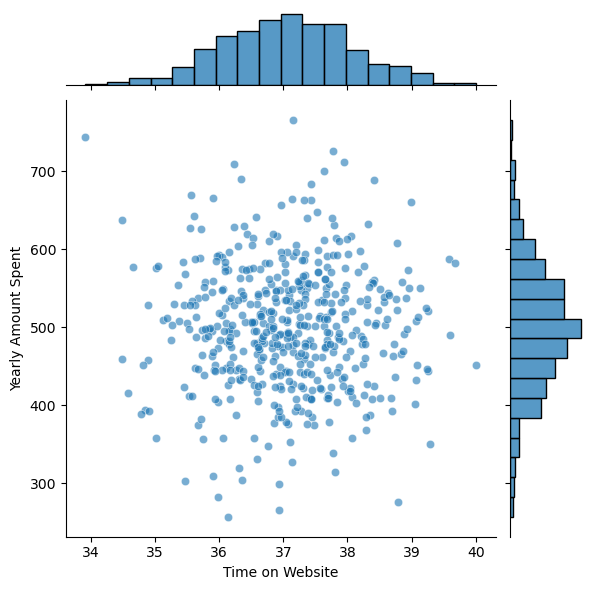

In [39]:
# Time on the website vs Yearly amount spend 
sns.jointplot(x='Time on Website',
             y='Yearly Amount Spent',
             data=customer_data,
             alpha=0.6
            
            )

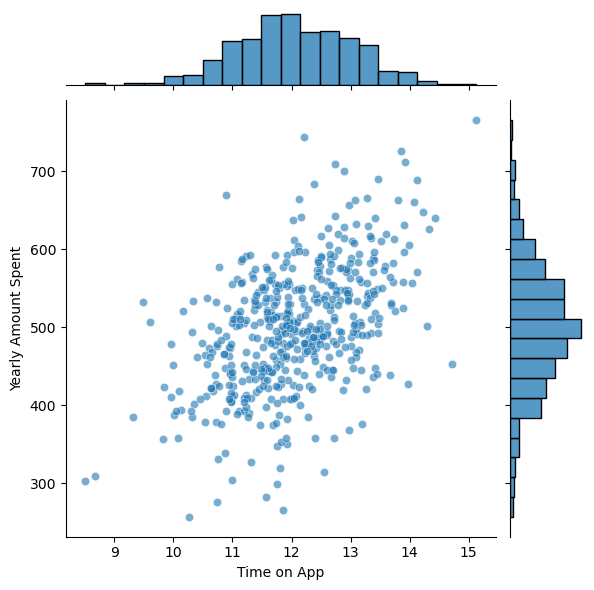

In [41]:
# Time on app  vs Yearly amount spend 
sns.jointplot(x='Time on App',
             y='Yearly Amount Spent',
             data=customer_data,
             alpha=0.6
            
            )

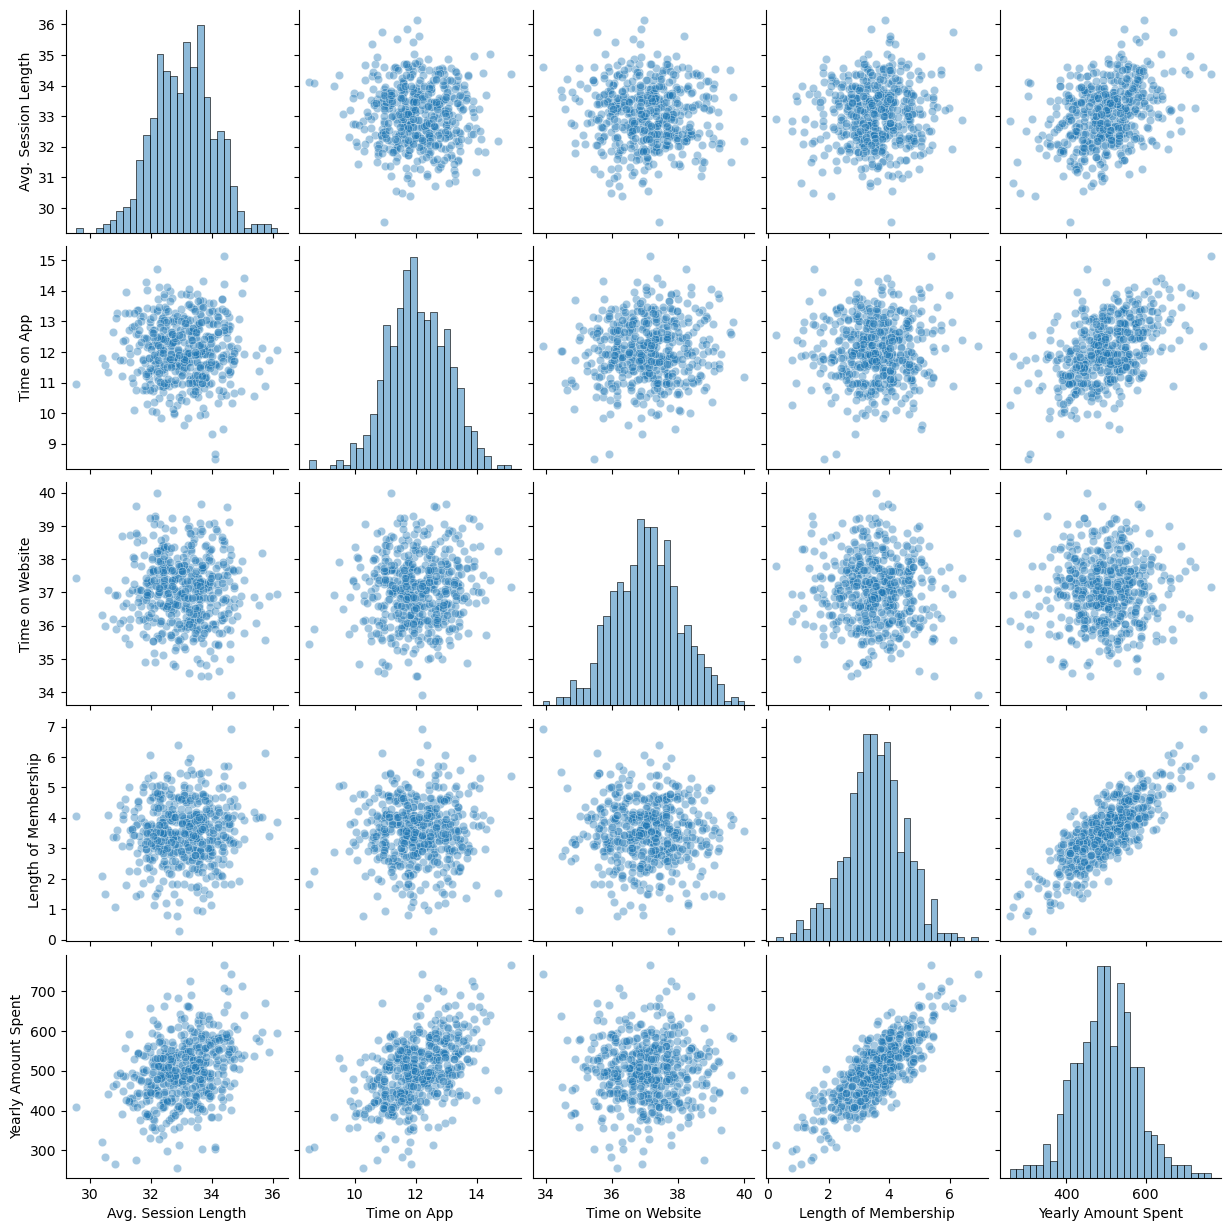

In [51]:
sns.pairplot(customer_data,
            kind='scatter',
            plot_kws={'alpha':0.4},
            diag_kws={'alpha':0.5,
            'bins':30}
        )

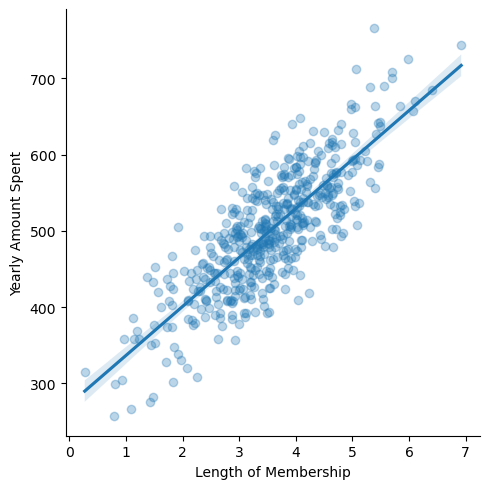

In [63]:
#Lengh of memnbership vs Yearly amount spent
sns.lmplot (x='Length of Membership',
           y='Yearly Amount Spent',
           data=customer_data,
           scatter_kws={'alpha':0.3})

### splitting the data 

X are the predictores, and y is the output. What we want to do is create a model that will take in the values in the X variable and predict y with a linear regression algorithm. We will use the SciKit Learn library to create the model.

In [69]:
from sklearn.model_selection import train_test_split

In [71]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [77]:
x=customer_data[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y=customer_data['Yearly Amount Spent']

In [79]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [81]:
x.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# Training the Model with multivariable regression using Scikit Learn

In this section, I created a model and trained it using the provided dataset. The model helps identify which features have the most significant impact on the output variable, Yearly Expenditure.

Based on the analysis and supported by visualizations, the most influential predictor is Length of Membership, followed by Time on App and Avg. Session Length. Interestingly, the Time on Website does not appear to play a significant role in determining the amount a customer spends annually.

These findings provide valuable insights for prioritizing strategies to enhance customer engagement and spending.

In [89]:
from sklearn.linear_model import LinearRegression

In [91]:
lm=LinearRegression()

In [99]:
lm.fit (x_train,y_train)

LinearRegression()

In [103]:
#The Coefficients
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [107]:
# the r Squared 
lm.score(x,y)

0.9842821675307222

In [115]:
#The coefficients in a dataframe 
cdf=pd.DataFrame(lm.coef_,x.columns,columns=['Coef'])
cdf

,Coef
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


## Training the model with multivariable regression using OLS(Ordinary Least Squares)

In [121]:
import statsmodels.api as sm
x=sm.add_constant(x_train)
model=sm.OLS(y_train,x)
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     5825.
Date:                 Wed, 01 Jan 2025   Prob (F-statistic):          3.46e-315
Time:                         19:55:42   Log-Likelihood:                -1296.2
No. Observations:                  350   AIC:                             2602.
Df Residuals:                      345   BIC:                             2622.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1050.6537     26.458    -39.710      0.000   -1102.694    -998.614
Avg. Session Length     25.7243      0.534     48.137      0.000      24.673      26.775
Time on App             38.5971      0.528     73.045      0.000      37.558      39.636
Time on Website          0.4591      0.520      0.884      0.377      -0.563       1.481
Length of Membership    61.6747      0.516    119.540      0.000      60.660      62.690
==============================================================================
Omnibus:                        1.523   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.467   Jarque-Bera (JB):                1.262
Skew:                          -0.108   Prob(JB):                        0.532
Kurtosis:                       3.199   Cond. No.                     2.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predicting Test Data

Now that the model is trained, I can use it to make predictions and evaluate its performance. To assess the accuracy of the model, I generated a scatter plot comparing the actual Yearly Expenditure values (𝑦actualy actual​) to the predicted values (
𝑦
predicted
y 
predicted
​
 ).

In [125]:
predictions=lm.predict(x_test)

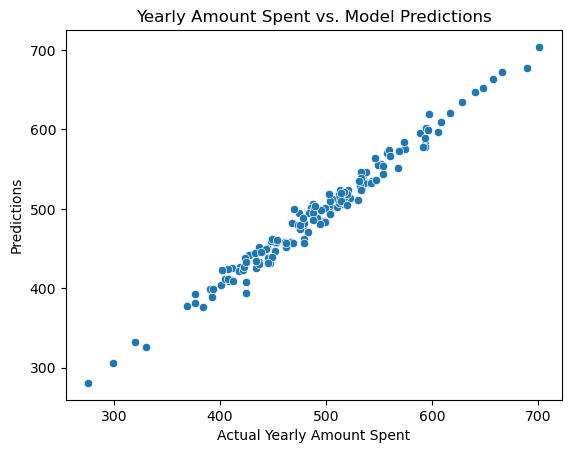

In [141]:
#scatter plot of actual values of y vs predicted values
# Scatter plot using seaborn
sns.scatterplot(x=y_test, y=predictions)
# Add labels and title
plt.ylabel('Predictions')
plt.xlabel('Actual Yearly Amount Spent')
plt.title('Yearly Amount Spent vs. Model Predictions')

# Show the plot
plt.show()

## Evaluation of the model

In [144]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math

In [146]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 8.426091641432073
Mean Squared Error: 103.9155413650329
Root Mean Squared Error: 10.193897260863134


## Residuals

Distribution plot of the residuals of the model's predictions. They should be normally distributed.

C:\Users\MUNYUA CHARLES\AppData\Local\Temp\ipykernel_11296\2558718287.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,bins=30)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

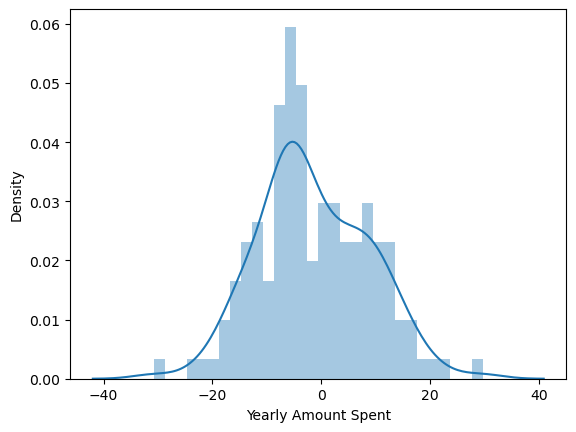

In [150]:
residuals=y_test-predictions
sns.distplot(residuals,bins=30)


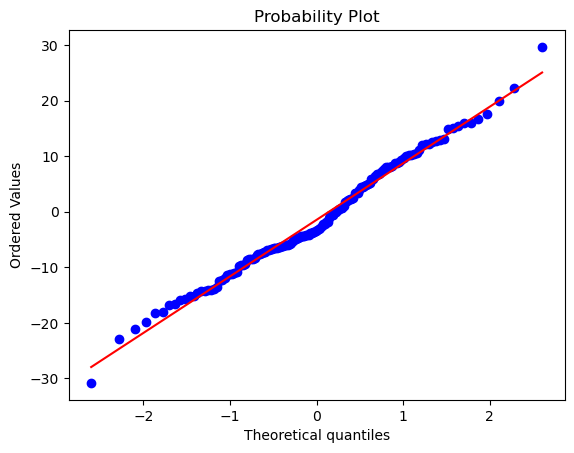

In [152]:
import   pylab
import scipy.stats as stats
stats.probplot(residuals,dist='norm',plot=pylab)
pylab.show()

## Conclusion

It can be tricky to interpret the information in this analysis. According to the model, the most significant factor for clients is not the time spent on the app or website, but their length of membership. However, of the two predictors (desktop vs app), the app has the strongest influence by far. In fact, the time spent on the desktop website does not seem to have any correlation at all! In other words, according to the data, the amount of time that the customer spends on the desktop website has almost nothing to do with the amount of money they will spend.

We could interpret this in two different ways. Firstly, this could mean that the desktop website needs more work to make its visitors buy more. Secondly, it could mean that people tend to be more influenced by mobile applications of online stores than by desktop websites. So maybe efforts should be directed towards taking advantage of this fact. Indeed, the interpretation of this information requires expertise in the online marketing sphere. Our analysis and our model, however, does a very good job in weighting the predictors importance.